In [1]:
import pandas as pd
from pandas import read_excel

from matplotlib import pyplot as plt

import numpy

from statistics import mean

In [2]:
file = 'Data371.xlsx'

In [3]:
bank_sauga = read_excel(file,0)
goldenhouse = read_excel(file,1)

In [4]:
bank_sauga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Day      430 non-null    object
 1   Hour     430 non-null    object
 2   Main     430 non-null    int64 
 3   Branch1  430 non-null    int64 
 4   Branch2  430 non-null    int64 
 5   Branch3  430 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 20.3+ KB


In [5]:
bank_sauga.describe()

,Main,Branch1,Branch2,Branch3
count,430.000000,430.000000,430.000000,430.000000
mean,53.462791,27.365116,27.290698,27.134884
std,28.321288,14.994457,14.749712,14.604672
min,13.000000,5.000000,3.000000,4.000000
25%,30.000000,16.000000,16.000000,16.000000
50%,50.000000,25.000000,24.000000,25.000000
75%,69.000000,34.000000,36.000000,35.000000
max,158.000000,87.000000,79.000000,74.000000


In [6]:
bank_sauga.columns

Index(['Day', 'Hour', 'Main', 'Branch1', 'Branch2', 'Branch3'], dtype='object')

In [7]:
bank_sauga.index

RangeIndex(start=0, stop=430, step=1)

In [8]:
bank_sauga.nunique()

Day          6
Hour         8
Main       105
Branch1     68
Branch2     66
Branch3     64
dtype: int64

In [9]:
#total number of customers in a specific branch
total_customers= {'Main':22989,'Branch1': 11767, 'Branch2':11735, 'Branch3': 11668}

In [10]:
bank_sauga.value_counts("Main")
# bank_sauga.querry('Main >20')

Main
22     16
26     14
24     10
70      9
25      9
       ..
90      1
86      1
15      1
16      1
158     1
Length: 105, dtype: int64

In [11]:
bank_sauga.value_counts("Branch1")

Branch1
17    27
32    18
13    18
27    17
30    16
      ..
55     1
54     1
52     1
51     1
87     1
Length: 68, dtype: int64

In [12]:
bank_sauga.groupby(by='Day').mean()

,Main,Branch1,Branch2,Branch3
Day,,,,
Fri,75.375000,40.0375,39.0500,38.950000
Mon,44.525000,22.6000,22.8750,22.612500
Sat,91.166667,47.2000,45.3000,45.733333
Thu,43.287500,22.0250,22.1250,22.400000
Tue,45.062500,22.6875,22.5125,22.362500
Wed,44.925000,22.0375,23.1375,22.375000


In [13]:
bank_sauga.groupby(by='Day').min()

,Hour,Main,Branch1,Branch2,Branch3
Day,,,,,
Fri,1 to 2,27,12,15,11
Mon,1 to 2,16,6,3,4
Sat,10 to 11,41,26,20,17
Thu,1 to 2,17,5,7,7
Tue,1 to 2,13,7,7,6
Wed,1 to 2,15,5,8,5


In [14]:
bank_sauga.groupby(by='Day').max()

,Hour,Main,Branch1,Branch2,Branch3
Day,,,,,
Fri,Noon to 1,139,74,71,71
Mon,Noon to 1,96,48,42,47
Sat,9 to 10,158,87,79,74
Thu,Noon to 1,85,49,49,44
Tue,Noon to 1,87,48,55,52
Wed,Noon to 1,91,47,43,49


In [15]:
bank_sauga.describe()

,Main,Branch1,Branch2,Branch3
count,430.000000,430.000000,430.000000,430.000000
mean,53.462791,27.365116,27.290698,27.134884
std,28.321288,14.994457,14.749712,14.604672
min,13.000000,5.000000,3.000000,4.000000
25%,30.000000,16.000000,16.000000,16.000000
50%,50.000000,25.000000,24.000000,25.000000
75%,69.000000,34.000000,36.000000,35.000000
max,158.000000,87.000000,79.000000,74.000000


In [16]:
c = 0
arr = []
while c< max(bank_sauga.count()):
    arr.append(bank_sauga.iloc[c:c+43])
    c +=43


In [17]:
hp = {}
hp['week1'] = arr[0]
hp['week2'] = arr[1]
hp['week3'] = arr[2]
hp['week4'] = arr[3]
hp['week5'] = arr[4]
hp['week6'] = arr[5]
hp['week7'] = arr[6]
hp['week8'] = arr[7]
hp['week9'] = arr[8]
hp['week10'] = arr[9]

In [18]:
# Average number of customers coming to each branch
print('________________')
print("Minimum number of customers coming to a Main Branch")
print(bank_sauga['Main'].groupby(bank_sauga['Hour']).mean())
print('________________')

print("Minimum number of customers coming to a Branch 1")
print(bank_sauga['Branch1'].groupby(bank_sauga['Hour']).mean())
print('________________')

print("Minimum number of customers coming to a Branch 2")
print(bank_sauga['Branch2'].groupby(bank_sauga['Hour']).mean())
print('________________')

print("Minimum number of customers coming to a Branch 3")
print(bank_sauga['Branch3'].groupby(bank_sauga['Hour']).mean())

________________
Minimum number of customers coming to a Main Branch
Hour
1 to 2        54.740000
10 to 11      30.900000
11 to noon    78.850000
2 to 3        36.740000
3 to 4        26.780000
4 to 5        74.400000
9 to 10       44.216667
Noon to 1     82.360000
Name: Main, dtype: float64
________________
Minimum number of customers coming to a Branch 1
Hour
1 to 2        27.900000
10 to 11      16.400000
11 to noon    39.283333
2 to 3        19.700000
3 to 4        14.080000
4 to 5        37.820000
9 to 10       22.616667
Noon to 1     41.880000
Name: Branch1, dtype: float64
________________
Minimum number of customers coming to a Branch 2
Hour
1 to 2        27.820000
10 to 11      16.000000
11 to noon    38.566667
2 to 3        18.940000
3 to 4        14.140000
4 to 5        38.480000
9 to 10       22.683333
Noon to 1     42.620000
Name: Branch2, dtype: float64
________________
Minimum number of customers coming to a Branch 3
Hour
1 to 2        27.740000
10 to 11      16.900000
11

In [19]:
# Maximum number of customers coming to each branch
print('________________')
print("Maximum number of customers coming to a Main Branch")
print(bank_sauga['Main'].groupby(bank_sauga['Hour']).max())
print('________________')

print("Maximum number of customers coming to a Branch 1")
print(bank_sauga['Branch1'].groupby(bank_sauga['Hour']).max())
print('________________')

print("Maximum number of customers coming to a Branch 2")
print(bank_sauga['Branch2'].groupby(bank_sauga['Hour']).max())
print('________________')

print("Maximum number of customers coming to a Branch 3")
print(bank_sauga['Branch3'].groupby(bank_sauga['Hour']).max())

________________
Maximum number of customers coming to a Main Branch
Hour
1 to 2         88
10 to 11       67
11 to noon    158
2 to 3         69
3 to 4         44
4 to 5        123
9 to 10        93
Noon to 1     139
Name: Main, dtype: int64
________________
Maximum number of customers coming to a Branch 1
Hour
1 to 2        59
10 to 11      39
11 to noon    87
2 to 3        35
3 to 4        33
4 to 5        74
9 to 10       49
Noon to 1     73
Name: Branch1, dtype: int64
________________
Maximum number of customers coming to a Branch 2
Hour
1 to 2        61
10 to 11      34
11 to noon    79
2 to 3        39
3 to 4        30
4 to 5        71
9 to 10       52
Noon to 1     71
Name: Branch2, dtype: int64
________________
Maximum number of customers coming to a Branch 3
Hour
1 to 2        50
10 to 11      39
11 to noon    74
2 to 3        37
3 to 4        28
4 to 5        68
9 to 10       50
Noon to 1     71
Name: Branch3, dtype: int64


In [20]:
# Minimum number of customers coming to each branch
print('________________')
print("Minimum number of customers coming to a Main Branch")
print(bank_sauga['Main'].groupby(bank_sauga['Hour']).min())
print('________________')

print("Minimum number of customers coming to a Branch 1")
print(bank_sauga['Branch1'].groupby(bank_sauga['Hour']).min())
print('________________')

print("Minimum number of customers coming to a Branch 2")
print(bank_sauga['Branch2'].groupby(bank_sauga['Hour']).min())
print('________________')

print("Minimum number of customers coming to a Branch 3")
print(bank_sauga['Branch3'].groupby(bank_sauga['Hour']).min())


________________
Minimum number of customers coming to a Main Branch
Hour
1 to 2        33
10 to 11      13
11 to noon    48
2 to 3        19
3 to 4        17
4 to 5        50
9 to 10       22
Noon to 1     46
Name: Main, dtype: int64
________________
Minimum number of customers coming to a Branch 1
Hour
1 to 2        13
10 to 11       5
11 to noon    20
2 to 3         9
3 to 4         5
4 to 5        20
9 to 10        8
Noon to 1     22
Name: Branch1, dtype: int64
________________
Minimum number of customers coming to a Branch 2
Hour
1 to 2        14
10 to 11       3
11 to noon    22
2 to 3         8
3 to 4         7
4 to 5        22
9 to 10        9
Noon to 1     24
Name: Branch2, dtype: int64
________________
Minimum number of customers coming to a Branch 3
Hour
1 to 2        13
10 to 11       5
11 to noon    17
2 to 3         8
3 to 4         4
4 to 5        23
9 to 10        7
Noon to 1     22
Name: Branch3, dtype: int64


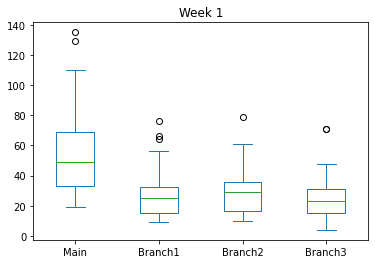

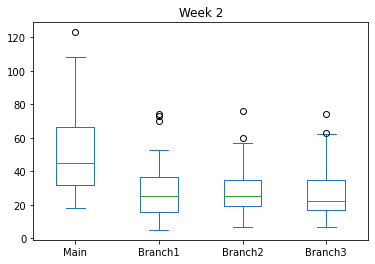

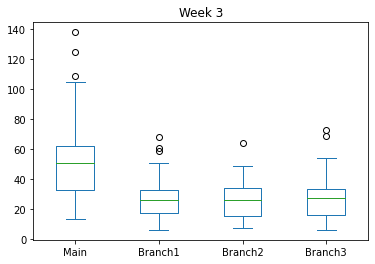

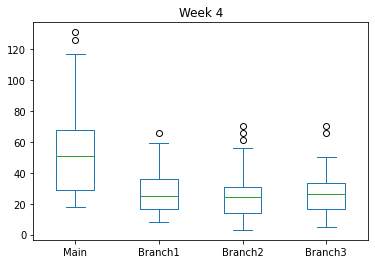

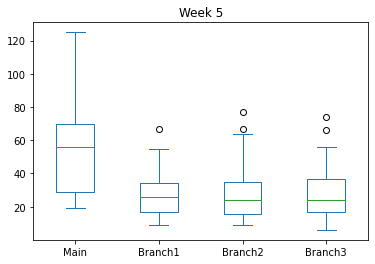

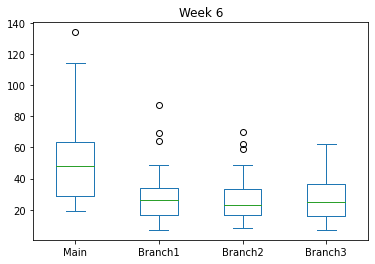

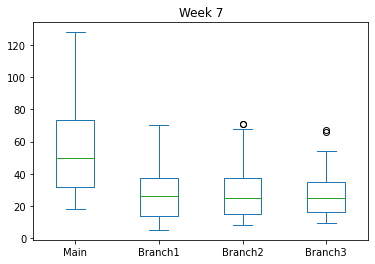

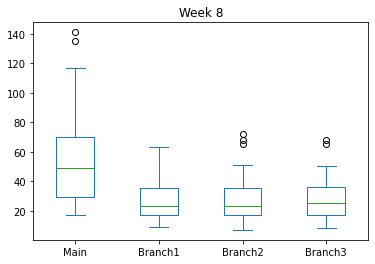

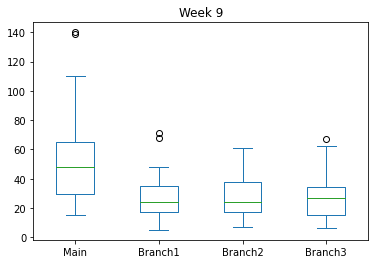

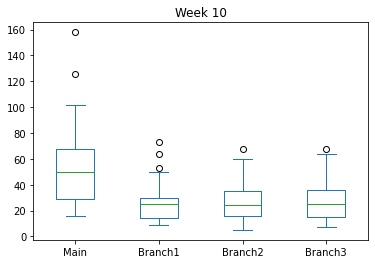

In [21]:
w =1
for plot in arr:
    wk = "Week " +str(w)
    plot.plot(x='Day',y=['Main', 'Branch1','Branch2', 'Branch3'], kind="box", title = wk)
    w+=1
    

<AxesSubplot:>

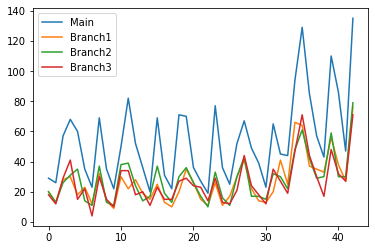

In [22]:
hp['week1'].plot(y=['Main', 'Branch1','Branch2', 'Branch3'])

In [23]:
# largest number of customer for Main Branch 
for week in range(len(arr)):
    print('Information about week',week+1)
    print(arr[week].nlargest(5, columns='Main'))
    print('____')
    print('\n')

Information about week 1
    Day        Hour  Main  Branch1  Branch2  Branch3
42  Sat  11 to noon   135       76       79       71
35  Fri   Noon to 1   129       64       61       71
39  Fri      4 to 5   110       56       59       48
34  Fri  11 to noon    94       66       48       47
40  Sat     9 to 10    86       38       30       32
____


Information about week 2
    Day        Hour  Main  Branch1  Branch2  Branch3
85  Sat  11 to noon   123       70       76       74
78  Fri   Noon to 1   108       73       60       63
46  Mon   Noon to 1    96       37       41       35
77  Fri  11 to noon    96       53       52       51
79  Fri      1 to 2    88       37       45       48
____


Information about week 3
     Day        Hour  Main  Branch1  Branch2  Branch3
128  Sat  11 to noon   138       61       64       73
121  Fri   Noon to 1   125       68       46       69
125  Fri      4 to 5   109       59       47       54
120  Fri  11 to noon   105       47       49       51
105  

In [24]:
# largest number of customer for Branch 1
for week in range(len(arr)):
    print('Information about week',week+1)
    print(arr[week].nlargest(5, columns='Branch1'))
    print('____')
    print('\n')

Information about week 1
    Day        Hour  Main  Branch1  Branch2  Branch3
42  Sat  11 to noon   135       76       79       71
34  Fri  11 to noon    94       66       48       47
35  Fri   Noon to 1   129       64       61       71
39  Fri      4 to 5   110       56       59       48
27  Thu   Noon to 1    67       41       43       44
____


Information about week 2
    Day        Hour  Main  Branch1  Branch2  Branch3
82  Fri      4 to 5    83       74       57       62
78  Fri   Noon to 1   108       73       60       63
85  Sat  11 to noon   123       70       76       74
77  Fri  11 to noon    96       53       52       51
74  Thu      4 to 5    69       48       33       35
____


Information about week 3
     Day        Hour  Main  Branch1  Branch2  Branch3
121  Fri   Noon to 1   125       68       46       69
128  Sat  11 to noon   138       61       64       73
125  Fri      4 to 5   109       59       47       54
122  Fri      1 to 2    80       51       42       39
120  

In [25]:
# largest number of customer for Branch 2
for week in range(len(arr)):
    print('Information about week',week+1)
    print(arr[week].nlargest(5, columns='Branch2'))
    print('____')
    print('\n')

Information about week 1
    Day        Hour  Main  Branch1  Branch2  Branch3
42  Sat  11 to noon   135       76       79       71
35  Fri   Noon to 1   129       64       61       71
39  Fri      4 to 5   110       56       59       48
34  Fri  11 to noon    94       66       48       47
27  Thu   Noon to 1    67       41       43       44
____


Information about week 2
    Day        Hour  Main  Branch1  Branch2  Branch3
85  Sat  11 to noon   123       70       76       74
78  Fri   Noon to 1   108       73       60       63
82  Fri      4 to 5    83       74       57       62
77  Fri  11 to noon    96       53       52       51
79  Fri      1 to 2    88       37       45       48
____


Information about week 3
     Day        Hour  Main  Branch1  Branch2  Branch3
128  Sat  11 to noon   138       61       64       73
120  Fri  11 to noon   105       47       49       51
125  Fri      4 to 5   109       59       47       54
121  Fri   Noon to 1   125       68       46       69
93   

In [26]:
# largest number of customer for Branch 3
for week in range(len(arr)):
    print('Information about week',week+1)
    print(arr[week].nlargest(5, columns='Branch3'))
    print('____')
    print('\n')

Information about week 1
    Day        Hour  Main  Branch1  Branch2  Branch3
35  Fri   Noon to 1   129       64       61       71
42  Sat  11 to noon   135       76       79       71
39  Fri      4 to 5   110       56       59       48
34  Fri  11 to noon    94       66       48       47
27  Thu   Noon to 1    67       41       43       44
____


Information about week 2
    Day        Hour  Main  Branch1  Branch2  Branch3
85  Sat  11 to noon   123       70       76       74
78  Fri   Noon to 1   108       73       60       63
82  Fri      4 to 5    83       74       57       62
58  Tue      4 to 5    74       28       29       52
77  Fri  11 to noon    96       53       52       51
____


Information about week 3
     Day        Hour  Main  Branch1  Branch2  Branch3
128  Sat  11 to noon   138       61       64       73
121  Fri   Noon to 1   125       68       46       69
125  Fri      4 to 5   109       59       47       54
120  Fri  11 to noon   105       47       49       51
105  

In [27]:
# smallest number of customers for Main branch
for week in range(len(arr)):
    print('Information about week',week+1)
    print(arr[week].nsmallest(6, columns='Main'))
    print('____')
    print('\n')

Information about week 1
    Day      Hour  Main  Branch1  Branch2  Branch3
22  Wed    3 to 4    19       11       10       14
14  Tue    3 to 4    20       15       17       11
9   Tue  10 to 11    22        9       11       10
17  Wed  10 to 11    22       10       13       15
6   Mon    3 to 4    23       12       11        4
30  Thu    3 to 4    23       13       15       12
____


Information about week 2
    Day      Hour  Main  Branch1  Branch2  Branch3
52  Tue  10 to 11    18       15       12        9
60  Wed  10 to 11    19       12       19        7
65  Wed    3 to 4    21       13       17        9
44  Mon  10 to 11    22       17       16       13
49  Mon    3 to 4    22       15        7       12
51  Tue   9 to 10    26       20       20       15
____


Information about week 3
     Day      Hour  Main  Branch1  Branch2  Branch3
95   Tue  10 to 11    13       15       14       16
87   Mon  10 to 11    22        6       11       12
91   Mon    2 to 3    22       20       1

In [28]:
# smallest number of customers for branch 1
for week in range(len(arr)):
    print('Information about week',week+1)
    print(arr[week].nsmallest(6, columns='Branch1'))
    print('____')
    print('\n')

Information about week 1
    Day      Hour  Main  Branch1  Branch2  Branch3
9   Tue  10 to 11    22        9       11       10
17  Wed  10 to 11    22       10       13       15
22  Wed    3 to 4    19       11       10       14
24  Thu   9 to 10    36       11       16       13
6   Mon    3 to 4    23       12       11        4
1   Mon  10 to 11    26       13       13       12
____


Information about week 2
    Day      Hour  Main  Branch1  Branch2  Branch3
73  Thu    3 to 4    27        5       12       13
57  Tue    3 to 4    34        7       15       16
68  Thu  10 to 11    26        9       10        9
60  Wed  10 to 11    19       12       19        7
67  Thu   9 to 10    26       12       19       18
56  Tue    2 to 3    37       13       19       17
____


Information about week 3
     Day      Hour  Main  Branch1  Branch2  Branch3
87   Mon  10 to 11    22        6       11       12
108  Wed    3 to 4    22        6       13       12
103  Wed  10 to 11    26       10       1

In [29]:
# smallest number of customers for branch 2
for week in range(len(arr)):
    print('Information about week',week+1)
    print(arr[week].nsmallest(6, columns='Branch2'))
    print('____')
    print('\n')

Information about week 1
    Day      Hour  Main  Branch1  Branch2  Branch3
22  Wed    3 to 4    19       11       10       14
6   Mon    3 to 4    23       12       11        4
9   Tue  10 to 11    22        9       11       10
25  Thu  10 to 11    25       17       11       12
1   Mon  10 to 11    26       13       13       12
8   Tue   9 to 10    35       14       13       15
____


Information about week 2
    Day      Hour  Main  Branch1  Branch2  Branch3
49  Mon    3 to 4    22       15        7       12
64  Wed    2 to 3    32       21        9       22
68  Thu  10 to 11    26        9       10        9
52  Tue  10 to 11    18       15       12        9
73  Thu    3 to 4    27        5       12       13
57  Tue    3 to 4    34        7       15       16
____


Information about week 3
     Day      Hour  Main  Branch1  Branch2  Branch3
100  Tue    3 to 4    28       16        7       10
103  Wed  10 to 11    26       10       10       12
86   Mon   9 to 10    39       12       1

In [30]:
# smallest number of customers for branch 3
for week in range(len(arr)):
    print('Information about week',week+1)
    print(arr[week].nsmallest(6, columns='Branch3'))
    print('____')
    print('\n')

Information about week 1
    Day      Hour  Main  Branch1  Branch2  Branch3
6   Mon    3 to 4    23       12       11        4
9   Tue  10 to 11    22        9       11       10
14  Tue    3 to 4    20       15       17       11
1   Mon  10 to 11    26       13       13       12
25  Thu  10 to 11    25       17       11       12
30  Thu    3 to 4    23       13       15       12
____


Information about week 2
    Day      Hour  Main  Branch1  Branch2  Branch3
60  Wed  10 to 11    19       12       19        7
52  Tue  10 to 11    18       15       12        9
65  Wed    3 to 4    21       13       17        9
68  Thu  10 to 11    26        9       10        9
49  Mon    3 to 4    22       15        7       12
44  Mon  10 to 11    22       17       16       13
____


Information about week 3
     Day      Hour  Main  Branch1  Branch2  Branch3
92   Mon    3 to 4    25       12       20        6
116  Thu    3 to 4    28       11       12        9
100  Tue    3 to 4    28       16        

In [31]:
hp['week1'].max()

Day              Wed
Hour       Noon to 1
Main             135
Branch1           76
Branch2           79
Branch3           71
dtype: object

In [32]:
hp['week10'].groupby(by='Day').mean()

,Main,Branch1,Branch2,Branch3
Day,,,,
Fri,74.125000,38.125,35.750000,38.625
Mon,46.125000,21.000,20.125000,23.500
Sat,101.333333,42.000,46.666667,51.000
Thu,42.375000,19.750,22.125000,20.625
Tue,41.625000,21.875,23.375000,22.250
Wed,42.375000,21.000,24.250000,24.250


In [33]:
#Case 2
print(goldenhouse)

    Order  Deliverer  Prep Time  Travel Time  Distance
0       1          3       13.0         30.0      13.3
1       2          1       10.9         17.8       8.6
2       3          1        9.2          9.2       4.7
3       4          3        7.2         14.7       4.3
4       5          2       14.5         21.9      12.2
..    ...        ...        ...          ...       ...
71     72          3        7.0         31.3       8.6
72     73          1        9.0          3.5       1.5
73     74          1       13.1         11.9       4.4
74     75          1       11.0         11.6       3.6
75     76          2       12.0          7.5       3.3

[76 rows x 5 columns]


In [34]:
#checking if the dataset has non-null values.
goldenhouse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Order        76 non-null     int64  
 1   Deliverer    76 non-null     int64  
 2   Prep Time    76 non-null     float64
 3   Travel Time  76 non-null     float64
 4   Distance     76 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.1 KB


In [35]:
#getting a mean value of a particular driver of their travel time
goldenhouse['Travel Time'].groupby(goldenhouse['Deliverer']).mean()

Deliverer
1    12.248000
2    14.733333
3    19.717647
4    20.243750
Name: Travel Time, dtype: float64

Mean preparing time 11.51

Deliverer
1    11.276000
2    11.800000
3    11.064706
4    12.043750
Name: Prep Time, dtype: float64



<AxesSubplot:title={'center':'Prep Time'}, xlabel='Deliverer'>

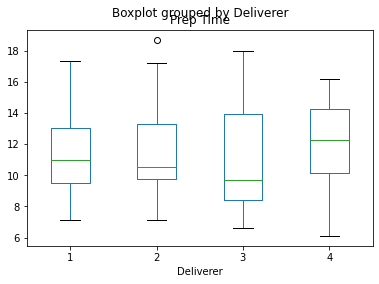

In [43]:
#getting a mean value of a particular drivers' prep time

print("Mean preparing time", round(mean(goldenhouse['Prep Time']),2))
print()
print(goldenhouse['Prep Time'].groupby(goldenhouse['Deliverer']).mean())
print()
goldenhouse.boxplot(by="Deliverer", column = ["Prep Time"], grid = False)

In [44]:
#getting a mean value of a particular drivers' travel distance
goldenhouse['Distance'].groupby(goldenhouse['Deliverer']).mean()

Deliverer
1    5.528000
2    7.261111
3    6.688235
4    5.850000
Name: Distance, dtype: float64

<AxesSubplot:>

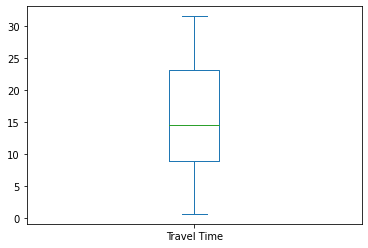

In [45]:
goldenhouse.plot(y= "Travel Time", x= "Distance", kind="box")

In [46]:
goldenhouse['Travel Time'][0]

30.0

In [47]:
#dictionary for containg the speed of their delivery.
deliverers = {1:[],2:[],3:[],4:[]}

for number in range(len(goldenhouse['Travel Time'])):
    speed = round((goldenhouse['Distance'][number] / goldenhouse['Travel Time'][number]),4)
    deliverers[goldenhouse['Deliverer'][number]].append(speed)

In [48]:
#total delivery time

In [49]:
deliverers[1]

[0.4831,
 0.5109,
 0.3955,
 0.3488,
 0.4828,
 0.3913,
 0.34,
 0.4545,
 0.4111,
 0.4762,
 0.5224,
 0.3596,
 0.4943,
 0.4526,
 0.4717,
 0.4242,
 0.3158,
 0.5159,
 0.4583,
 0.5714,
 0.537,
 0.5602,
 0.4286,
 0.3697,
 0.3103]

In [50]:

first = round(mean(deliverers[1]),4)
f_min = round(min(deliverers[1]),4)
f_max = round(max(deliverers[1]),4)

second = round(mean(deliverers[2]), 4)
s_min = round(min(deliverers[2]),4)
s_max = round(max(deliverers[2]),4)

third = round(mean(deliverers[3]),4)
t_min = round(min(deliverers[3]),4)
t_max = round(max(deliverers[3]),4)

fourth = round(mean(deliverers[4]), 4)
fo_min = round(min(deliverers[4]),4)
fo_max = round(max(deliverers[4]),4)

print("Average speed of first deliverer:",first, "miles per min")
print("Lowest speed of first deliverer:", f_min, "miles per min")
print("Highest speed of first deliverer:", f_max, "miles per min")
print('___________')

print("Average speed of second deliverer:", second, "miles per min")
print("Lowest speed of second deliverer:", s_min, "miles per min")
print("Highest speed of second deliverer:", s_max, "miles per min")
print('___________')

print("Average speed of third deliverer:", third, "miles per min")
print("Lowest speed of third deliverer:", t_min, "miles per min")
print("Highest speed of third deliverer:", t_max, "miles per min")
print('___________')

print("Average speed of fourth deliverer:", fourth, "miles per min")
print("Lowest speed of fourth deliverer:", fo_min, "miles per min")
print("Highest speed of fourth deliverer:", fo_max, "miles per min")


Average speed of first deliverer: 0.4434 miles per min
Lowest speed of first deliverer: 0.3103 miles per min
Highest speed of first deliverer: 0.5714 miles per min
___________
Average speed of second deliverer: 0.5023 miles per min
Lowest speed of second deliverer: 0.3576 miles per min
Highest speed of second deliverer: 0.6667 miles per min
___________
Average speed of third deliverer: 0.3485 miles per min
Lowest speed of third deliverer: 0.2323 miles per min
Highest speed of third deliverer: 0.4667 miles per min
___________
Average speed of fourth deliverer: 0.2944 miles per min
Lowest speed of fourth deliverer: 0.116 miles per min
Highest speed of fourth deliverer: 0.4362 miles per min


In [51]:
goldenhouse

,Order,Deliverer,Prep Time,Travel Time,Distance
0,1,3,13.0,30.0,13.3
1,2,1,10.9,17.8,8.6
2,3,1,9.2,9.2,4.7
3,4,3,7.2,14.7,4.3
4,5,2,14.5,21.9,12.2
...,...,...,...,...,...
71,72,3,7.0,31.3,8.6
72,73,1,9.0,3.5,1.5
73,74,1,13.1,11.9,4.4
74,75,1,11.0,11.6,3.6


In [52]:
# function that returns total time to deliver food from point A to point B
def total_time_to_deliver(prep, travel):
    return prep + travel

In [53]:
#dictionary for containg the total spent time to deliver food per single deliverer.
del_time = {1:[],2:[],3:[],4:[]}
dis_time = {1:[], 2:[],3:[],4:[]}

for number in range(len(goldenhouse['Travel Time'])):
    var = round(total_time_to_deliver(goldenhouse['Prep Time'][number], goldenhouse['Travel Time'][number]),1)
    del_time[goldenhouse['Deliverer'][number]].append(var)
    dis_time[goldenhouse["Deliverer"][number]].append(goldenhouse["Distance"][number])

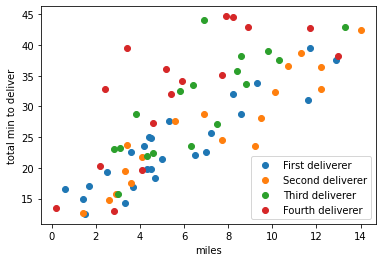

In [55]:

plt.scatter(dis_time[1], del_time[1],label='First deliverer')
plt.scatter( dis_time[2], del_time[2],label='Second deliverer')
plt.scatter( dis_time[3], del_time[3],label='Third deliverer')
plt.scatter( dis_time[4], del_time[4], label='Fourth deliverer')

plt.xlabel("miles")
plt.ylabel("total min to deliver")
plt.legend()

In [56]:
f_time = round(mean(deliverers[1]),4)
print(f_time)
s_time = round(mean(deliverers[2]), 4)
print(s_time)
t_time= round(mean(deliverers[3]),4)
print(t_time)
fo_time = round(mean(deliverers[4]), 4)
print(fo_time)

0.4434
0.5023
0.3485
0.2944


In [57]:
# the dictionary will contain total time that is > than M
s_time ={1:[],2:[],3:[],4:[]}
miles_cov = {1:[],2:[],3:[],4:[]}
M = 40
for i in range(1,5):
    for time in range(len(del_time[i])):
        # print(del_time[i][time])
        if del_time[i][time] >= M:
            s_time[i].append(del_time[i][time])
            miles_cov[i].append(dis_time[i][time])
            #printing the distance of the cases when it was delivered later than M
            print('Deliverer', i, "With the distance of", dis_time[i][time], "miles and time of", del_time[i][time], "minutes")
    print()


Deliverer 2 With the distance of 14.0 miles and time of 42.4 minutes

Deliverer 3 With the distance of 13.3 miles and time of 43.0 minutes
Deliverer 3 With the distance of 6.9 miles and time of 44.1 minutes

Deliverer 4 With the distance of 7.9 miles and time of 44.7 minutes
Deliverer 4 With the distance of 11.7 miles and time of 42.8 minutes
Deliverer 4 With the distance of 8.9 miles and time of 43.0 minutes
Deliverer 4 With the distance of 8.2 miles and time of 44.5 minutes



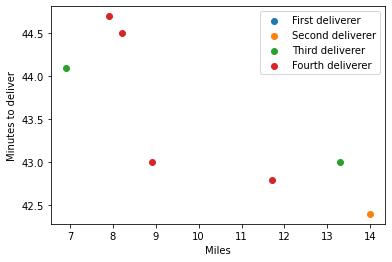

In [58]:
# from matplotlib import pyplot as plt
plt.scatter(miles_cov[1], s_time[1], label='First deliverer')
plt.scatter(miles_cov[2], s_time[2], label='Second deliverer')
plt.scatter(miles_cov[3], s_time[3], label='Third deliverer')
plt.scatter(miles_cov[4], s_time[4],label='Fourth deliverer')
# plt.scatter(late_dist[4], late_man[4], label = 'Fourth deliverer')
plt.xlabel("Miles")
plt.ylabel("Minutes to deliver")
plt.legend()



In [59]:
s_time

{1: [], 2: [42.4], 3: [43.0, 44.1], 4: [44.7, 42.8, 43.0, 44.5]}

In [60]:
#function that returns an expected delivery time, with distance as only needed parameter.
def exp_time(distance):
    extra_min = 5
    exp_delivery_time=(14.8+(2.06 * distance)) + extra_min
    return exp_delivery_time

In [61]:
#late_man is a dict that stores all deliverers and their delivery time which exceeded the predicted time
late_man = {1:[], 2:[],3:[],4:[]}
late_dist = {1:[],2:[],3:[],4:[]}
late_prep = {1:[], 2:[], 3:[],4:[]}

for number in range(len(goldenhouse['Travel Time'])):
    # the function that outputs total time to deliver including the preparing time.
    tt =total_time_to_deliver(goldenhouse['Prep Time'][number], goldenhouse['Travel Time'][number])
    
    if tt > exp_time(goldenhouse['Distance'][number]):
        # print(goldenhouse['Travel Time'][number], goldenhouse["Deliverer"][number])
        late_man[goldenhouse["Deliverer"][number]].append(tt)
        late_dist[goldenhouse["Deliverer"][number]].append(goldenhouse["Distance"][number])
        late_prep[goldenhouse["Deliverer"][number]].append(goldenhouse["Prep Time"][number])

In [62]:
late_man

{1: [],
 2: [],
 3: [28.8, 44.1, 32.5, 33.5, 38.3],
 4: [39.5, 32.0, 44.7, 34.1, 36.1, 43.0, 44.5, 32.8]}

In [63]:
late_dist

{1: [],
 2: [],
 3: [3.8, 6.9, 5.8, 6.4, 8.6],
 4: [3.4, 5.4, 7.9, 5.9, 5.2, 8.9, 8.2, 2.4]}

In [64]:
late_prep

{1: [],
 2: [],
 3: [18.0, 14.4, 8.4, 9.7, 7.0],
 4: [10.2, 12.5, 15.7, 15.6, 9.9, 14.3, 16.2, 14.2]}

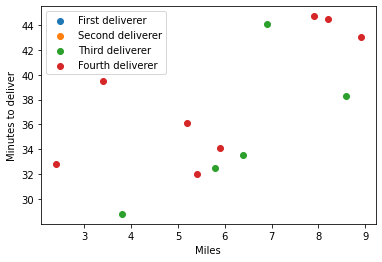

In [65]:
# First and second has not came late
plt.scatter(late_dist[1],late_man[1], label='First deliverer')
plt.scatter(late_dist[2],late_man[2], label='Second deliverer')

plt.scatter(late_dist[3],late_man[3], label='Third deliverer')
plt.scatter(late_dist[4], late_man[4], label = 'Fourth deliverer')
plt.xlabel("Miles")
plt.ylabel("Minutes to deliver")
plt.legend()